In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [3]:
application_df.duplicated().sum()

0

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns = ['EIN'], inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train and Evaluate the Model
Attempt #1
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = relu

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 176508    
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 176,707
Trainable params: 176,707
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [16]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 6ms/step - loss: 0.5210 - accuracy: 0.7381
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.2672 - accuracy: 0.8857
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1348 - accuracy: 0.9457
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1083 - accuracy: 0.9544
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1019 - accuracy: 0.9568
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0999 - accuracy: 0.9572
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0972 - accuracy: 0.9581
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0962 - accuracy: 0.9584
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0954 - accuracy: 0.9592
Epoch 10/100
804/804 [==============================] - 4s 4ms/step - loss: 0.0937 - accura

804/804 [==============================] - 3s 4ms/step - loss: 0.0802 - accuracy: 0.9665
Epoch 82/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0802 - accuracy: 0.9667
Epoch 83/100
804/804 [==============================] - 4s 4ms/step - loss: 0.0796 - accuracy: 0.9672
Epoch 84/100
804/804 [==============================] - 4s 5ms/step - loss: 0.0797 - accuracy: 0.9675
Epoch 85/100
804/804 [==============================] - 4s 5ms/step - loss: 0.0797 - accuracy: 0.9670
Epoch 86/100
804/804 [==============================] - 4s 4ms/step - loss: 0.0796 - accuracy: 0.9672
Epoch 87/100
804/804 [==============================] - 4s 5ms/step - loss: 0.0798 - accuracy: 0.9664
Epoch 88/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0799 - accuracy: 0.9668
Epoch 89/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0797 - accuracy: 0.9670
Epoch 90/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0796 - accuracy: 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 5s - loss: 0.5759 - accuracy: 0.7264 - 5s/epoch - 18ms/step
Loss: 0.5758815407752991, Accuracy: 0.7264139652252197


<AxesSubplot:>

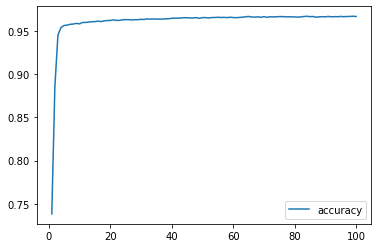

In [18]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [35]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity1.h5')

RESULTS:

This is Attempt #1
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = relu

Loss: 0.5758815407752991, Accuracy: 0.7264139652252197

A loss value of 57 indicates that the model can be further optimized.
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

I need to make some changes in order to get to 75% accuracy.

I also ran the following variables through this model:


APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 12
layer2 = 24

Loss: 0.5522796763553564, Accuracy: 0.7250145673751831


APPLICATION_TYPE cutoff = 800
CLASSIFICATION cutoff = 1000
layer1 = 12
layer2 = 24

Loss: 0.5575985619278065, Accuracy: 0.7231487035751343

Attempt #2 -- adding a hidden layer
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = relu
layer3 = 27 : activation function = relu

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 176508    
                                                                 
 dense_4 (Dense)             (None, 18)                180       
                                                                 
 dense_5 (Dense)             (None, 27)                513       
                                                                 
 dense_6 (Dense)             (None, 1)                 28        
                                                                 
Total params: 177,229
Trainable params: 177,229
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [39]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4920 - accuracy: 0.7674
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.3154 - accuracy: 0.8575
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1621 - accuracy: 0.9386
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1145 - accuracy: 0.9556
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.1015 - accuracy: 0.9612
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0988 - accuracy: 0.9611
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0970 - accuracy: 0.9619
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.9621
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0946 - accuracy: 0.9623
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0943 - accura

804/804 [==============================] - 3s 3ms/step - loss: 0.0836 - accuracy: 0.9660
Epoch 82/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0841 - accuracy: 0.9655
Epoch 83/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0838 - accuracy: 0.9661
Epoch 84/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9661
Epoch 85/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0834 - accuracy: 0.9661
Epoch 86/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0833 - accuracy: 0.9659
Epoch 87/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0835 - accuracy: 0.9665
Epoch 88/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0835 - accuracy: 0.9659
Epoch 89/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0835 - accuracy: 0.9663
Epoch 90/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0831 - accuracy: 

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6051 - accuracy: 0.7290 - 616ms/epoch - 2ms/step
Loss: 0.6051175594329834, Accuracy: 0.7289795875549316


<AxesSubplot:>

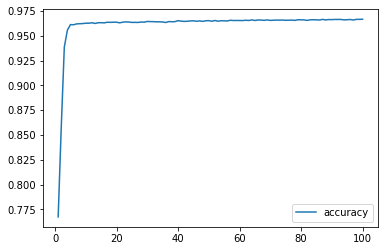

In [41]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [42]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity2.h5')

RESULTS:

This is Attempt #2
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = relu
layer3 = 27 : activation function = relu

Loss: 0.6051175594329834, Accuracy: 0.7289795875549316

A loss value of 60 indicates that the model can be further optimized.
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

Still not at 75% accuracy. Will try something drastic next.

I also ran the following variables through this model:


APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 12
layer2 = 24
layer3 = 36

Loss: 0.5545361445735565, Accuracy: 0.7241982221603394


APPLICATION_TYPE cutoff = 800
CLASSIFICATION cutoff = 1000
layer1 = 12
layer2 = 24
layer3 = 36

Loss: 0.5560268456039207, Accuracy: 0.7268804907798767

Attempt #3 -- changing the activation functions
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = tanh
layer3 = 27 : activation function = tanh

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9)                 176508    
                                                                 
 dense_8 (Dense)             (None, 18)                180       
                                                                 
 dense_9 (Dense)             (None, 27)                513       
                                                                 
 dense_10 (Dense)            (None, 1)                 28        
                                                                 
Total params: 177,229
Trainable params: 177,229
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [46]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 6ms/step - loss: 0.5095 - accuracy: 0.7510
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.2453 - accuracy: 0.9076
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1599 - accuracy: 0.9370
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1276 - accuracy: 0.9522
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1036 - accuracy: 0.9596
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0973 - accuracy: 0.9614
Epoch 7/100
804/804 [==============================] - 4s 4ms/step - loss: 0.0954 - accuracy: 0.9617
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0941 - accuracy: 0.9613
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0927 - accuracy: 0.9633
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0919 - accura

804/804 [==============================] - 3s 3ms/step - loss: 0.0805 - accuracy: 0.9669
Epoch 82/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0813 - accuracy: 0.9671
Epoch 83/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0807 - accuracy: 0.9676
Epoch 84/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0809 - accuracy: 0.9673
Epoch 85/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0801 - accuracy: 0.9673
Epoch 86/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0800 - accuracy: 0.9673
Epoch 87/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0804 - accuracy: 0.9675
Epoch 88/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0801 - accuracy: 0.9673
Epoch 89/100
804/804 [==============================] - 3s 3ms/step - loss: 0.0806 - accuracy: 0.9675
Epoch 90/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0800 - accuracy: 

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4860 - accuracy: 0.7645 - 1s/epoch - 4ms/step
Loss: 0.4859570264816284, Accuracy: 0.764548122882843


<AxesSubplot:>

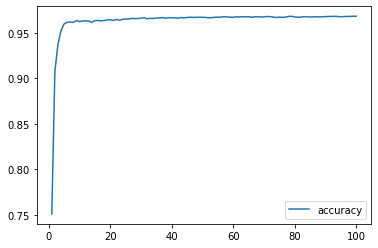

In [48]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [49]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity3.h5')

RESULTS:

This is Attempt #3
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = tanh
layer3 = 27 : activation function = tanh

Loss: 0.4859570264816284, Accuracy: 0.764548122882843

A loss value of 48 indicates that the model can be further optimized.
The accuracy percent shows that 76% of the model's predicted values align with the true values in the original dataset.


